**Table of contents**

>[Problem statement](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=K490kTLRB_l6)

>[Proposal](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=ip6nbji5CDKP)

>[Dataset - Video Games Sales](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=hdhWQpiaCOS_)

>[Imports](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=_Q0ItSZSC8bo)

>[Part 1: Exploratory Data Analysis and Data Preprocessing](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=2s0hGkGoESH1)

>[Step 1: Load Dataset](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=PZYmsvy_FTQ8)

>[Step 2: Dataset Dimensions and Head](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=Q3Elm7cZFbes)

>[Step 3: Describe the Dataset](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=AsnkbR0tFveP)

>[Step 4:Get missing Value Information.](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=qQsFlFo7MBvA)

>[Step 5: Further Data Exploration](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=p_ELsCrCO39w)

>[Step 7: Annotated Correlation Matrices](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=LcDe5nzuPoZc)

>[Part 2: Visulaization](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=W-372HauRL6M)

>[Feature Engineering](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=Hi_zoQUYTS14)

>[Models Selection](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=kcSEi9ZPqS-J)

>[Comparing the models](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=h1QAmkaGqsna)

>[Hyperparameters tuning](#updateTitle=true&folderId=11DWmUTjwkMzyBpdOfHTN3j6yW9yRS3Ow&scrollTo=DR-h939KqyeQ)



#Problem statement
The video game market has only continued to grow over the years and is now spanning all genres. It has continued to grow and expand into a lot of different walks of life, from movies and TV-shows to even books/fan-fiction. With this growing market the various gaming publishers will want to capitalize on the interests of the various gamers within it and picking the right kind of game to develop and put out into the market could make or break a gaming publisher/studio.

The rise in the market also comes with a rise in gamer expectations for the type of video games they want to play, thus making games has continued to get more expensive as time progressed. This puts further strain on publishers if they develop the wrong game and it flops in the market, it becomes a huge waste of time, money and resources for them. Thus, creating a model based on past successes and failures in the gaming marketplace will help them to decide which type of game to make and where to market it for the best sales results possible.

# **Proposal**


I will evaluate the performance of multiple different models to determine which one performs the best with the dataset and the models I will be using is: Linear Regression, Random Forest, K-Nearest Neighbor (regression), and Decision Tree. I think it is important to utilize various different type of models so as to not limit the tools available to oneself for analysis. These models will be utilized through the scikit-learn implementations.

To ensure that the data will not have any data points that would otherwise skew the models in any particular way, i will be removing all records that have data that is more than three standard deviations away from the mean before i start my modeling.

I will determine how the different models perform with the data by splitting the dataset into training and testing sets and using the training set for my initial model analysis. I will evaluate the performance of each model using the adjusted R squared value, where the closer to 1 the better the model is. I will be using k fold cross validation to check to see if my models are under or over fitting my data and make changes accordingly.

After determining which model performs the best with the data, I will then use that model to predict the sales of video games using the "unseen" test data to see how it performs. The model prediction performance will also be evaluated using adjusted R squared, where the closer to 1 the better the predictions are.




#**Dataset - Video Games Sales**





* Download Location: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/data

* Columns:

  * Name - The game's name

  *  Platform - Platform of the games release (i.e. PC,PS4, etc.)

  *  Year - Year of the game's release

  *  Genre - Genre of the game

  * Publisher - Publisher of the game

  * Rating - Rating of the game

  * NA_Sales - Sales in North America (in millions)

  * EU_Sales - Sales in Europe (in millions)

  * JP_Sales - Sales in Japan (in millions)

  * Other_Sales - Sales in the rest of the world (in millions)

  * Global_Sales - Total worldwide sales

# **Imports**


In [1]:
import numpy as np, pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.style as style
from plotly import __version__
from sklearn import linear_model
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as ex
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import cufflinks as cf
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# **Part 1: Exploratory Data Analysis and Data Preprocessing**



 **Step 1: Load Dataset**

In [2]:
videogame_df=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df=videogame_df

 **Step 2: Dataset Dimensions and Head**

In [3]:
print("Dataset Dimensions: {:,} columns and {:,} rows".format(videogame_df.shape[1], videogame_df.shape[0]))

videogame_df.head()

Dataset Dimensions: 16 columns and 16,719 rows


Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Developer Rating  
0          51.0         8.0       322.0  Nintendo      E  
1           NaN         NaN         NaN       NaN    NaN  
2          73.0         8.3       709.0  Nintendo      E  
3          73.0         8.0       192.0  Nintendo      E  
4           NaN         NaN         NaN       NaN    NaN

 **Step 3: Describe the Dataset**


In [4]:
print("Describe Data:")
videogame_df.describe()

Describe Data:


Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count  16719.000000  16719.000000   8137.000000   8137.000000  7590.000000   
mean       0.047332      0.533543     68.967679     26.360821     7.125046   
std        0.186710      1.547935     13.938165     18.980495     1.500006   
min        0.000000      0.010000     13.000000      3.000000     0.000000   
25%        0.000000      0.060000     60.000000     12.000000     6.400000   
50%        0.010000      0.170000     71.000000     21.000000     7.500000   
75%        0.030000      0.470000     79.000000     36.000000     8.200000   
max       10.570000     82.530000     98.000000    113.000000     9.700000   

         User_Count  
count   7590.000000  
mean     162.229908  
std      561.282326  
min        4.000000  
25%       10.000000  
50%       24.000000  
75%       81.000000  
max    10665.000000

 **Step 4:Get missing Value Information.**

In [5]:
 #calculate the total of null and empty values in each column
nasales_null_count=videogame_df["NA_Sales"].isna().sum()+videogame_df["NA_Sales"].eq('').sum()

eusales_null_count=videogame_df["EU_Sales"].isna().sum()+videogame_df["EU_Sales"].eq('').sum()

jpsales_null_count=videogame_df["JP_Sales"].isna().sum()+videogame_df["JP_Sales"].eq('').sum()

othersales_null_count=videogame_df["Other_Sales"].isna().sum()+videogame_df["Other_Sales"].eq('').sum()

globalsales_null_count=videogame_df["Global_Sales"].isna().sum()+videogame_df["Global_Sales"].eq('').sum()

criscore_null_count=videogame_df["Critic_Score"].isna().sum()+videogame_df["Critic_Score"].eq('').sum()

criticcount_null_count=videogame_df["Critic_Count"].isna().sum()+videogame_df["Critic_Count"].eq('').sum()

us_null_count=videogame_df["User_Score"].isna().sum()+videogame_df["User_Score"].eq('').sum()

uc_null_count=videogame_df["User_Count"].isna().sum()+videogame_df["User_Count"].eq('').sum()
developer_null_count=videogame_df["Developer"].isna().sum()+videogame_df["Developer"].eq('').sum()

rating_null_count=videogame_df["Rating"].isna().sum()+videogame_df["Rating"].eq('').sum()

Displaying the persentge of null in each recore the recored

In [6]:
print("total na sales  null value",nasales_null_count)
print("persentge of the missing values na sales ",nasales_null_count/len(videogame_df))

print("total EU_Sales e null value",eusales_null_count)
print("persentge of the missing values EU_Sales ",eusales_null_count/len(videogame_df))

print("total JP_Sales  null value",jpsales_null_count)
print("persentge of the missing values JP_Sales",jpsales_null_count/len(videogame_df))

print("total Other_Sales  null value",othersales_null_count)
print("persentge of the missing values Other_Sales ",othersales_null_count/len(videogame_df))

print("total Global_Sales null value",globalsales_null_count)
print("persentge of the missing values Global_Sales ",globalsales_null_count/len(videogame_df))

print("total critic score null value",criscore_null_count)
print("persentge of the missing values critic score ",criscore_null_count/len(videogame_df))

print("total Critic_Count null value",criticcount_null_count)
print("persentge of the missing values Critic_Count ",criticcount_null_count/len(videogame_df))

print("total User_Score null value",us_null_count)
print("persentge of the missing values User_Score ",us_null_count/len(videogame_df))

print("total User_Count null value",uc_null_count)
print("persentge of the missing values User_Count ",uc_null_count/len(videogame_df))

total na sales  null value 0
persentge of the missing values na sales  0.0
total EU_Sales e null value 0
persentge of the missing values EU_Sales  0.0
total JP_Sales  null value 0
persentge of the missing values JP_Sales 0.0
total Other_Sales  null value 0
persentge of the missing values Other_Sales  0.0
total Global_Sales null value 0
persentge of the missing values Global_Sales  0.0
total critic score null value 8582
persentge of the missing values critic score  0.5133082122136492
total Critic_Count null value 8582
persentge of the missing values Critic_Count  0.5133082122136492
total User_Score null value 9129
persentge of the missing values User_Score  0.5460254799928226
total User_Count null value 9129
persentge of the missing values User_Count  0.5460254799928226


 **Step 5: Further Data Exploration**



**Proportion of Global Video Game Sales by Genre**


In [7]:
ex.pie(videogame_df, names='Genre', title='Proportion of Global Video Game Sales by Genre')


We can see that the "Action" genre is the most popular type of video game by far.




**Top 25 Video Game Sales by Platform and Region**


Text(0, 0.5, 'Sales (In Millions)')

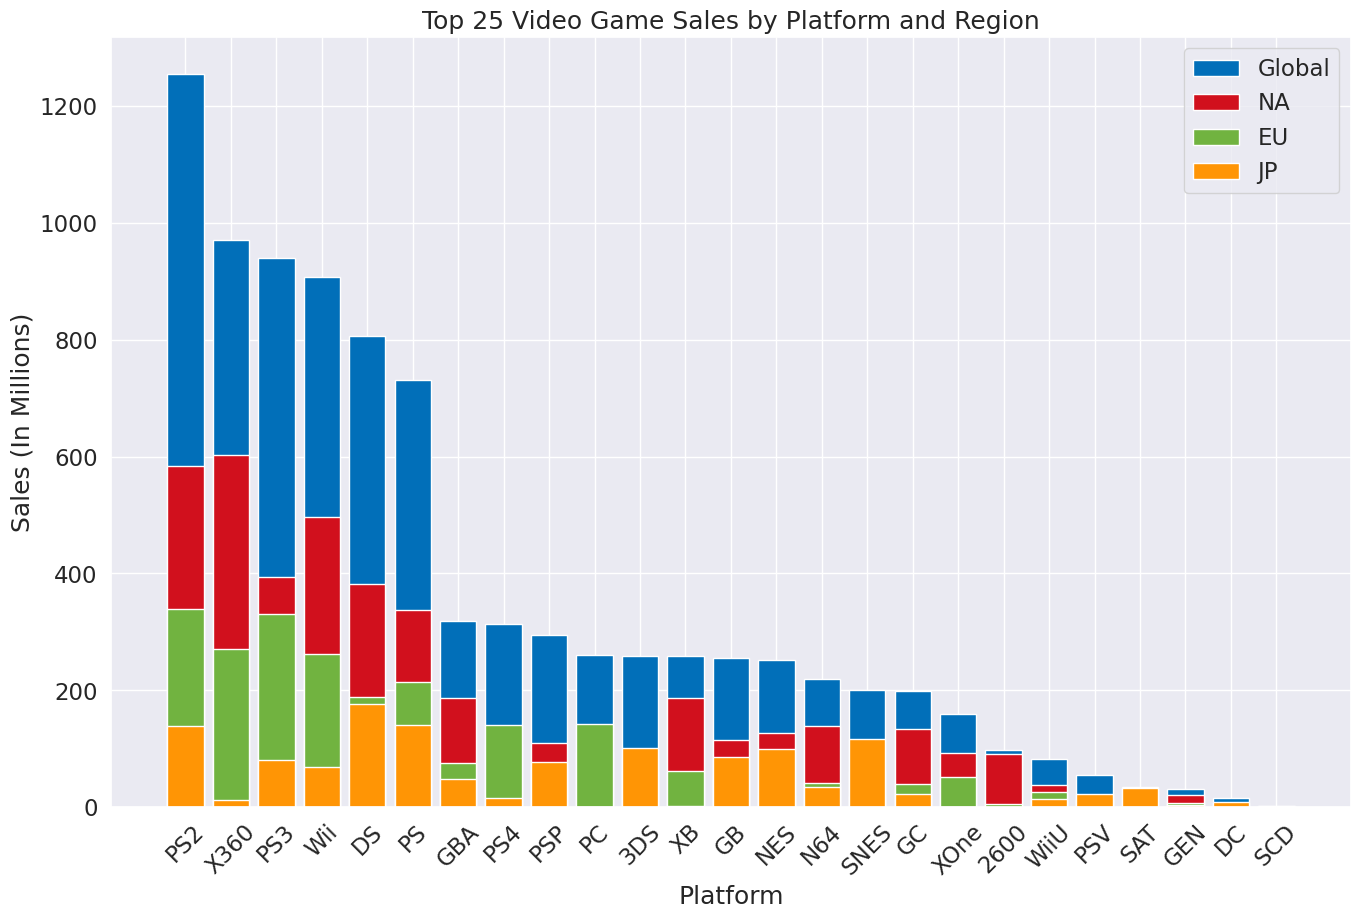

In [8]:
plt.rcParams['figure.figsize'] = (16, 10)
sns.set(font_scale = 1.5)

sales_list = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']
vid_plat_reg = videogame_df.groupby('Platform')[sales_list].sum().sort_values(by='Global_Sales', ascending=False).reset_index()

color_labels = zip(sales_list, ['#016FB9', '#D1101D', '#71B340', '#FF9505'])

for i, j in color_labels:
    sns.histplot(
        vid_plat_reg[:25],
        x='Platform',
        weights=i,
        multiple='stack',
        edgecolor='white',
        shrink=0.8,
        bins=5,
        label=i.split('_')[0],
        color=j,
        alpha=1
    )

plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.title('Top 25 Video Game Sales by Platform and Region')
plt.ylabel('Sales (In Millions)')

 **Step 7: Annotated Correlation Matrices**



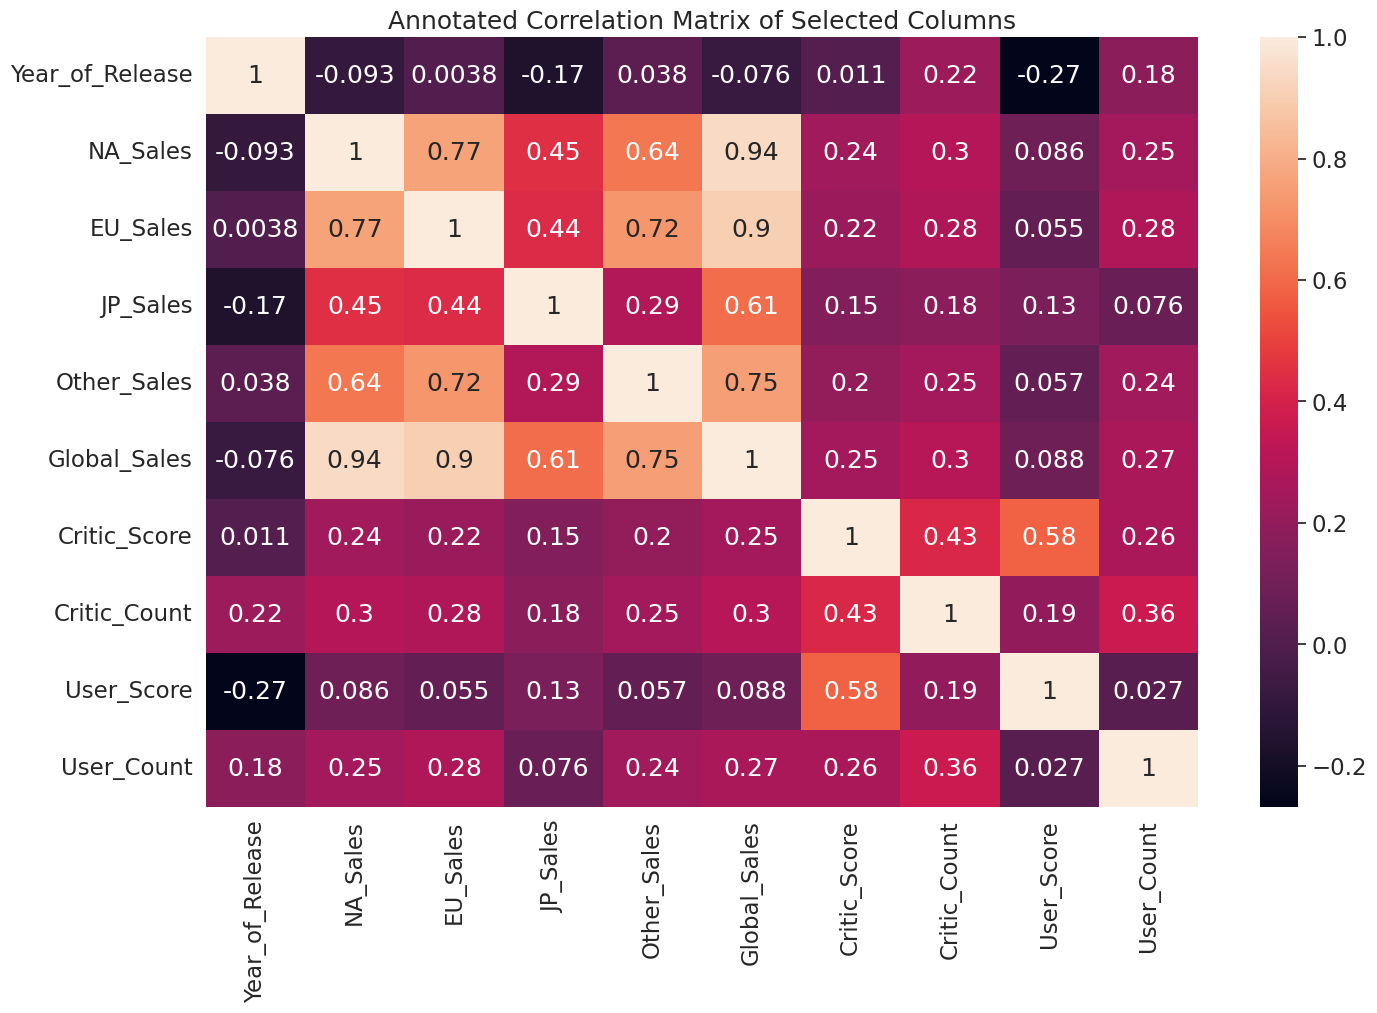

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 10)

sns.set(font_scale=1.5)
sns.set_style(style='white')

# Selecting the columns you want to include
columns_to_include = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
                      'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Selecting those columns from the DataFrame
selected_data = videogame_df[columns_to_include]

# Calculating the correlation matrix for the selected columns
correlation_matrix = selected_data.corr()

# Creating the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True)
heatmap.set_title('Annotated Correlation Matrix of Selected Columns')

plt.show()


The matrix above makes it clear that the year column has no significant relationship with any of the sales columns, and thus it can be safely dropped from the dataset.

# **Part 2: Visulaization**

In [10]:
genre_group=videogame_df['Genre'].value_counts().sort_index()


In [11]:
x=genre_group.index
y=genre_group.values

In [12]:
#Scatter_Plot

# Perform the iplot to get the Plotly figure object
fig = genre_group.iplot(
    kind='scatter',
    mode='lines+markers',
    title='Genre Distribution',
    xTitle='Categories',
    yTitle='Number of Games',
    dimensions=(1000, 500),
    asFigure=True
)

# Extracting data from the Plotly figure object
x = fig['data'][0]['x']
y = fig['data'][0]['y']

# Add the additional scatter plot trace
fig.add_trace(go.Scatter(x=['Genre'], mode='markers', name='Genre Distribution',
                         marker=dict(color='red', size=10), showlegend=True,
                         text=['Genre Distribution'], textposition='bottom center'))

# Plot the modified figure using iplot
iplot(fig)


In [13]:
platform=videogame_df['Platform'].value_counts().sort_index()
platform

Platform
2600     133
3DO        3
3DS      520
DC        52
DS      2152
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      393
PSP     1209
PSV      432
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: count, dtype: int64

In [14]:
m=platform.index
n=platform.values

# Create the bar trace
trace = go.Bar(
    x=m,
    y=n,
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
   # text=['Platform Distribution'] * len(m),  # Text label for each bar
    hoverinfo='x+y+text',  # Information displayed on hover
)

# Define layout
layout = go.Layout(
    title='Platform Distribution',
    xaxis=dict(title='Categories'),
    yaxis=dict(title='Number of users'),
    showlegend=False,  # Hide legend as it's a single trace plot
    width=1200,  # Adjust width of the plot
    height=500,  # Adjust height of the plot
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
)

# Create figure object
fig = go.Figure(data=[trace], layout=layout)

# Plot using iplot
iplot(fig)


In [15]:
rating=df['Rating'].value_counts().sort_index()
rating

Rating
AO         1
E       3991
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: count, dtype: int64

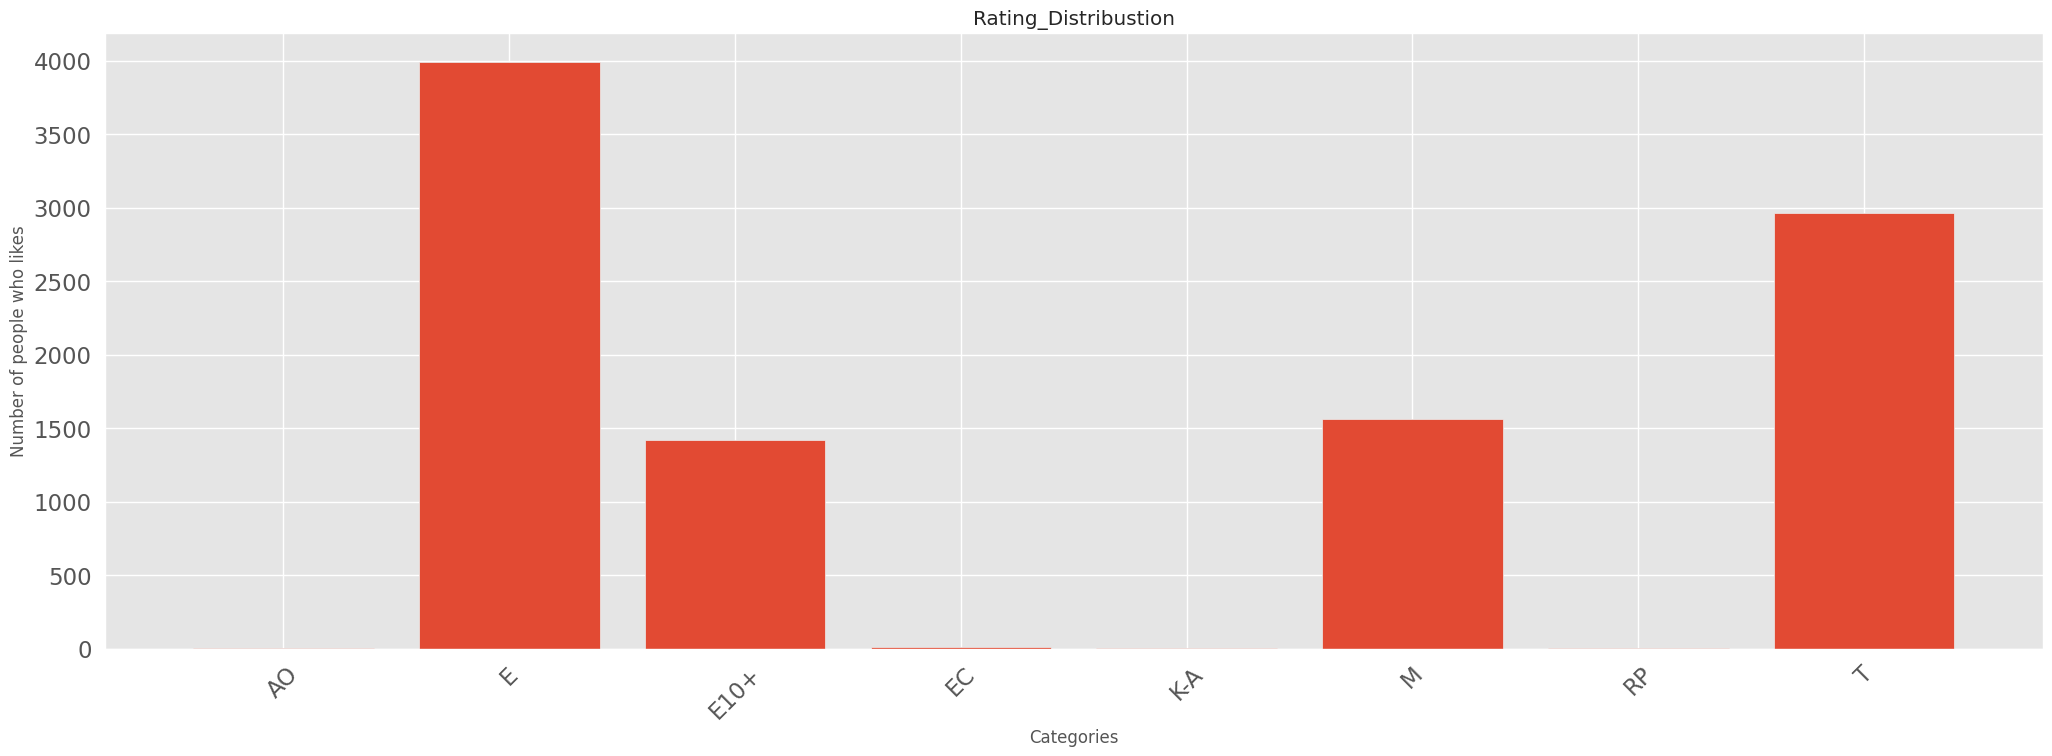

In [16]:

u=rating.index
v=rating.values
plt.style.use("ggplot")
plt.figure(figsize=(25,8))
plt.bar(u,v)
plt.title("Rating_Distribustion")
plt.xlabel("Categories")
plt.ylabel("Number of people who likes")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Year_of_Release', ylabel='Rating'>

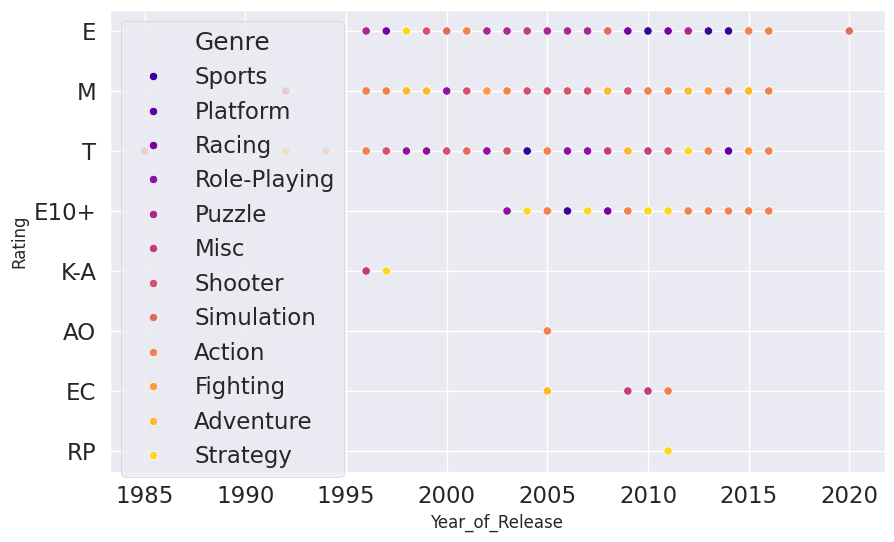

In [17]:
df.reset_index(drop=True, inplace=True)  # Reset the index without creating a new column for the old index
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Year_of_Release", y="Rating",hue="Genre",palette='plasma')

<Figure size 1000x2000 with 0 Axes>

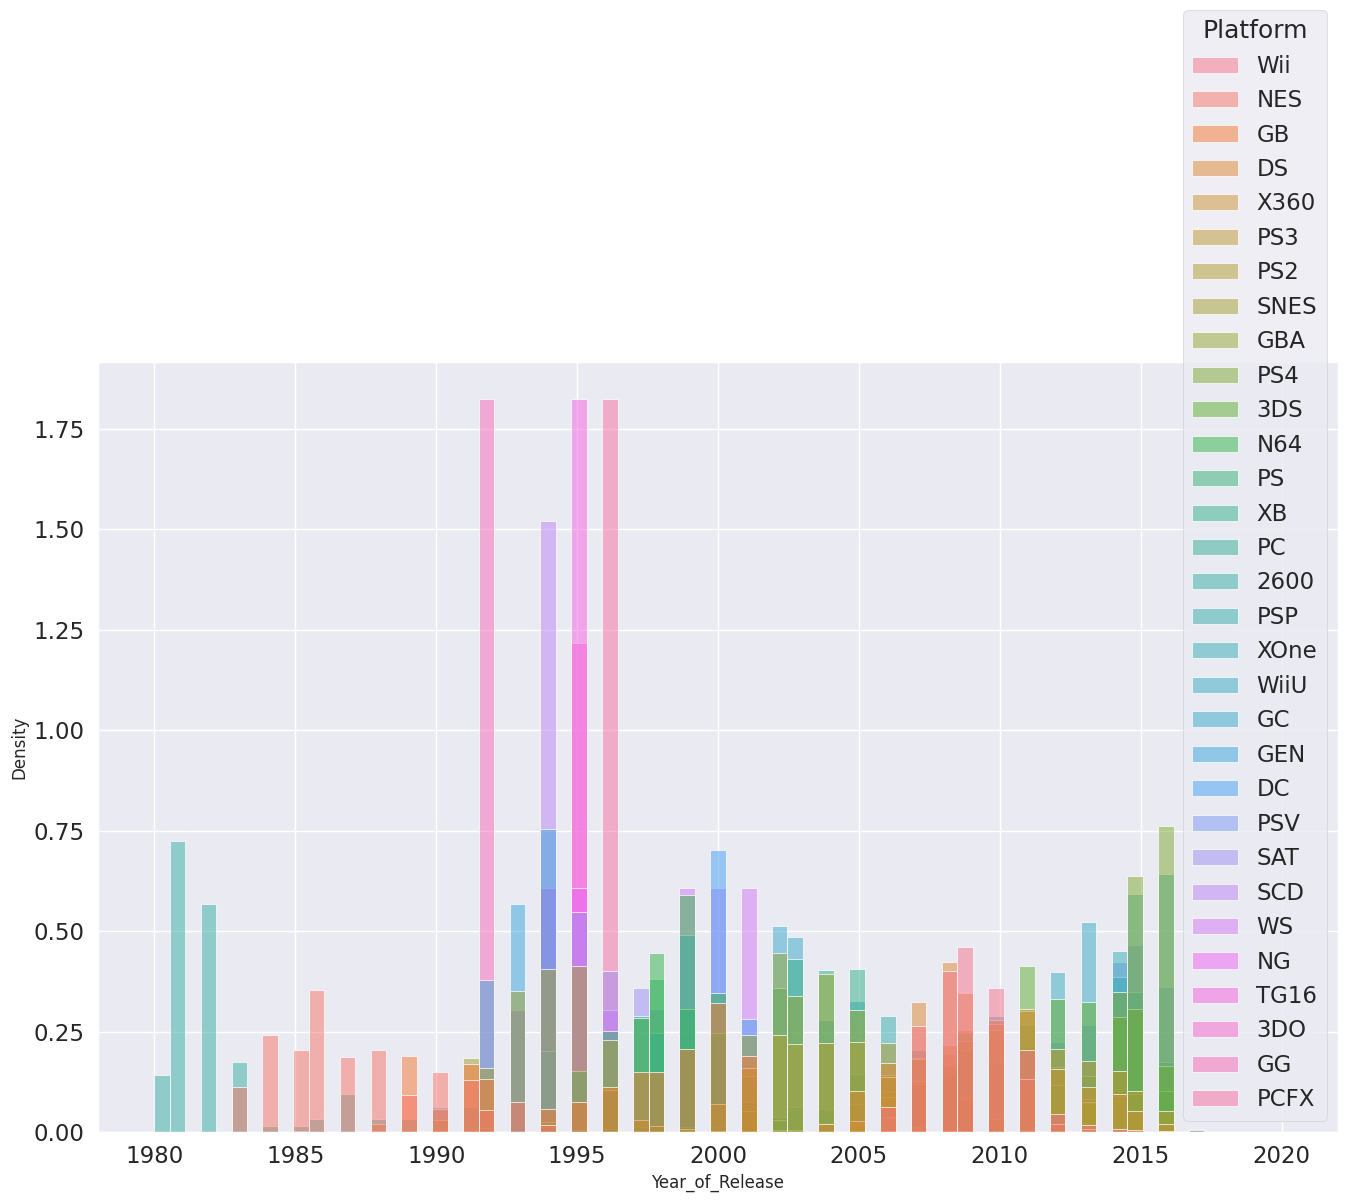

<Figure size 1000x2000 with 0 Axes>

In [18]:
sns.histplot(df , x='Year_of_Release', hue="Platform",stat='density',common_norm=False)
plt.figure(figsize=(10, 20))


<Figure size 2000x3000 with 0 Axes>

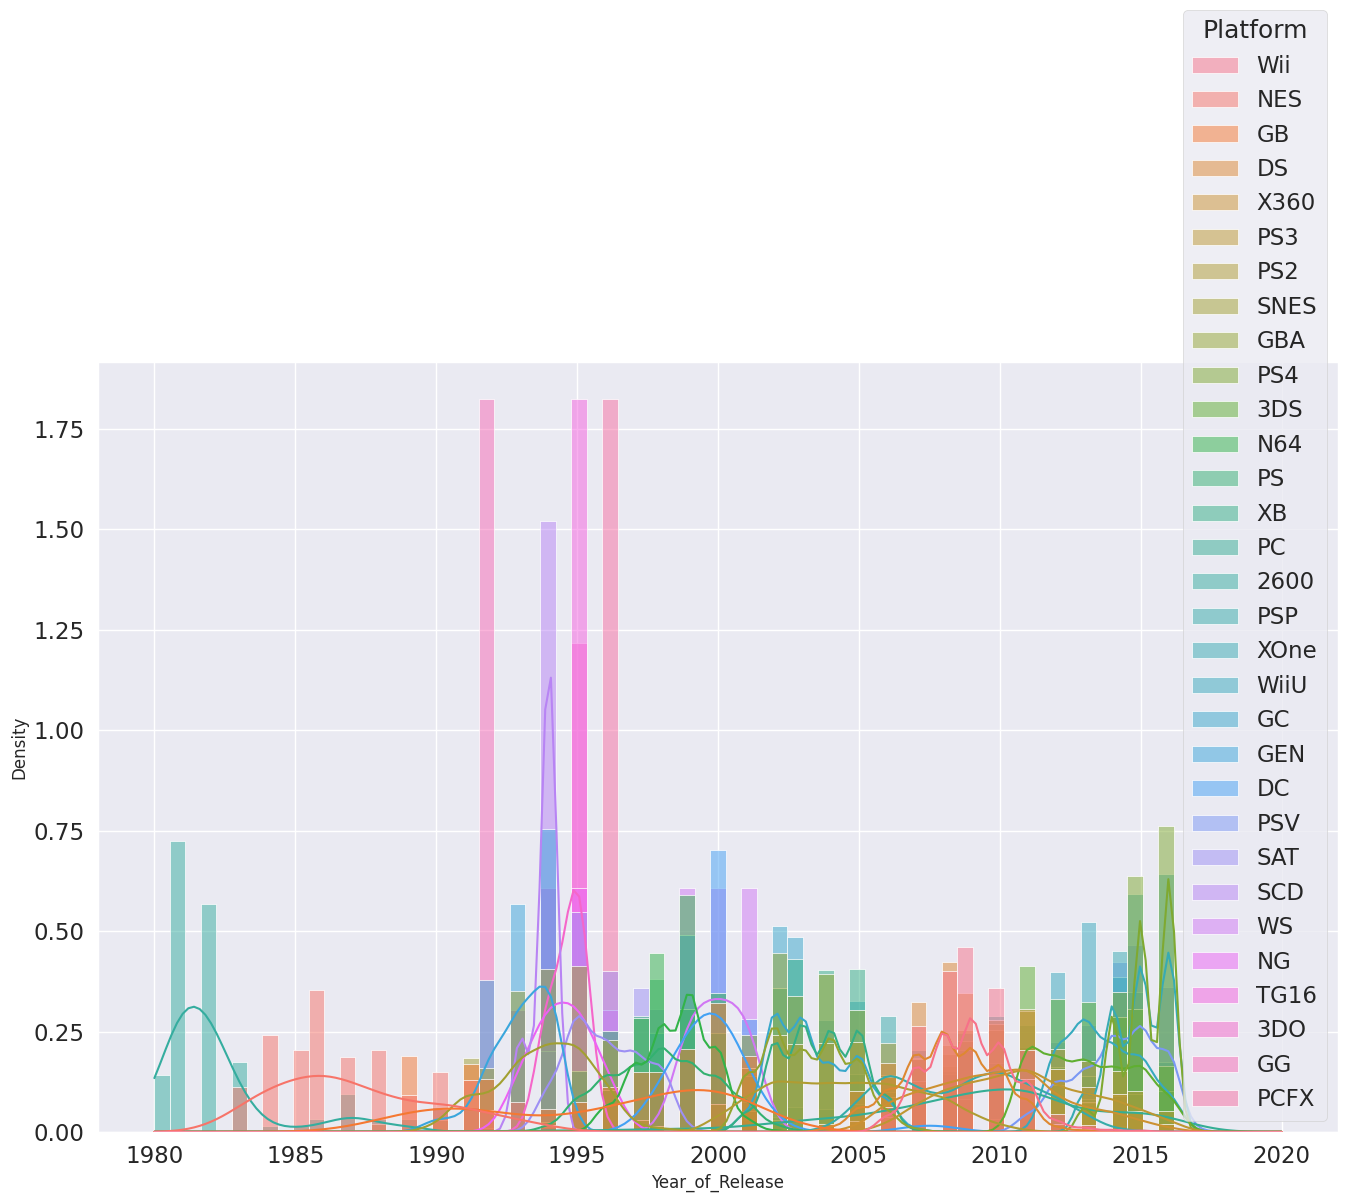

<Figure size 2000x3000 with 0 Axes>

In [19]:

# Histogram
sns.histplot(df , x='Year_of_Release', hue="Platform",kde=True,stat='density',common_norm=False)
plt.figure(figsize=(20, 30))



Genre
Action          1745.27
Sports          1332.00
Shooter         1052.94
Role-Playing     934.40
Platform         828.08
Misc             803.18
Racing           728.90
Fighting         447.48
Simulation       390.42
Puzzle           243.02
Adventure        237.69
Strategy         174.50
Name: Global_Sales, dtype: float64


<ipython-input-20-7cdc76af32e1>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




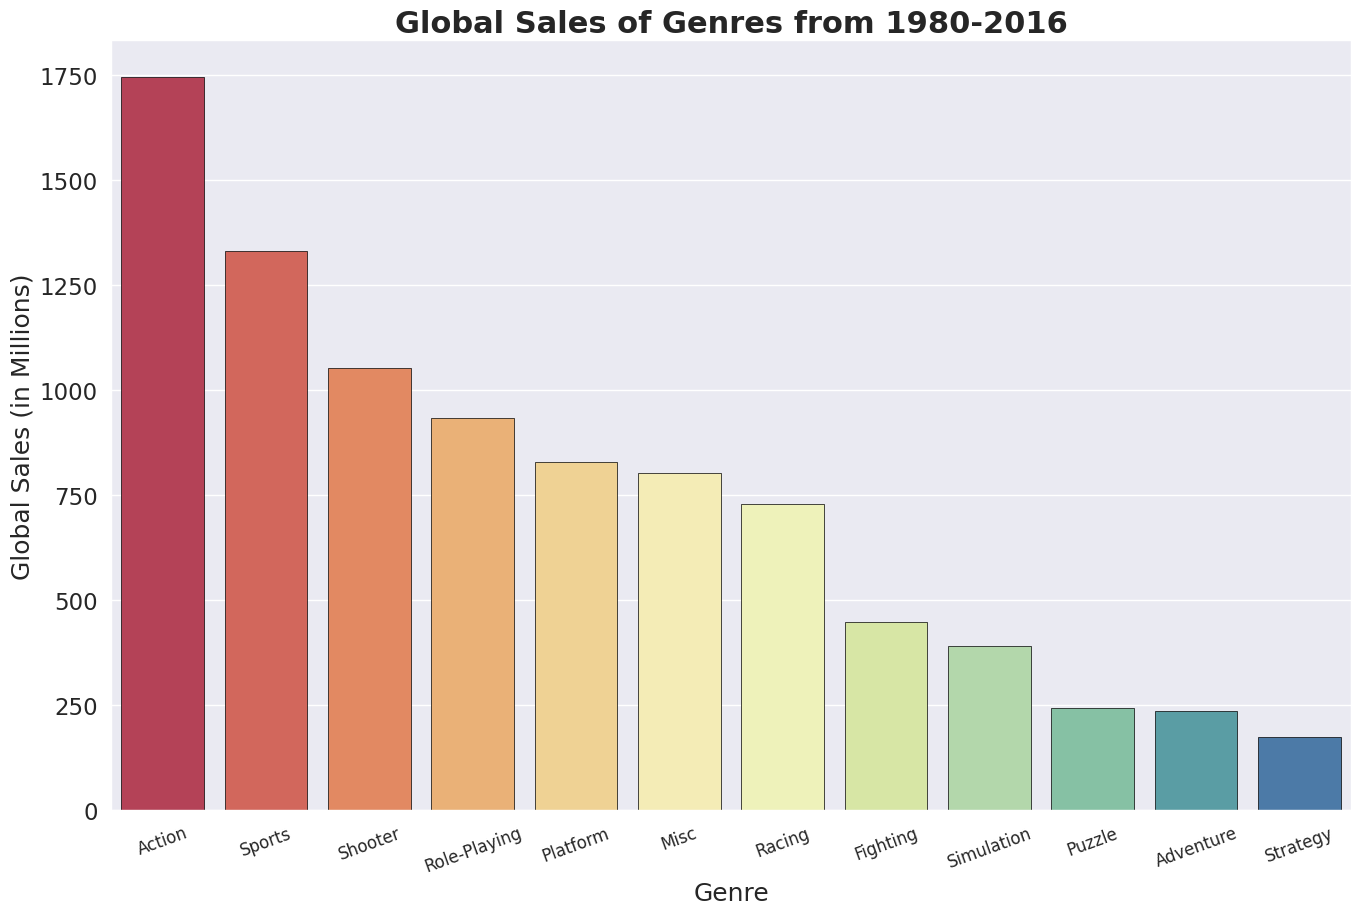

In [20]:

genre_global_sales = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)

print(genre_global_sales)

sns.barplot(x=genre_global_sales.index, y=genre_global_sales.values, ec='Black', palette='Spectral')
plt.xticks(rotation=20, fontsize=12)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Global Sales (in Millions)', fontsize=18)
plt.title('Global Sales of Genres from 1980-2016', fontweight='bold', fontsize=22)

plt.show()

<ipython-input-21-8014abb9e235>:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-21-8014abb9e235>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-21-8014abb9e235>:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




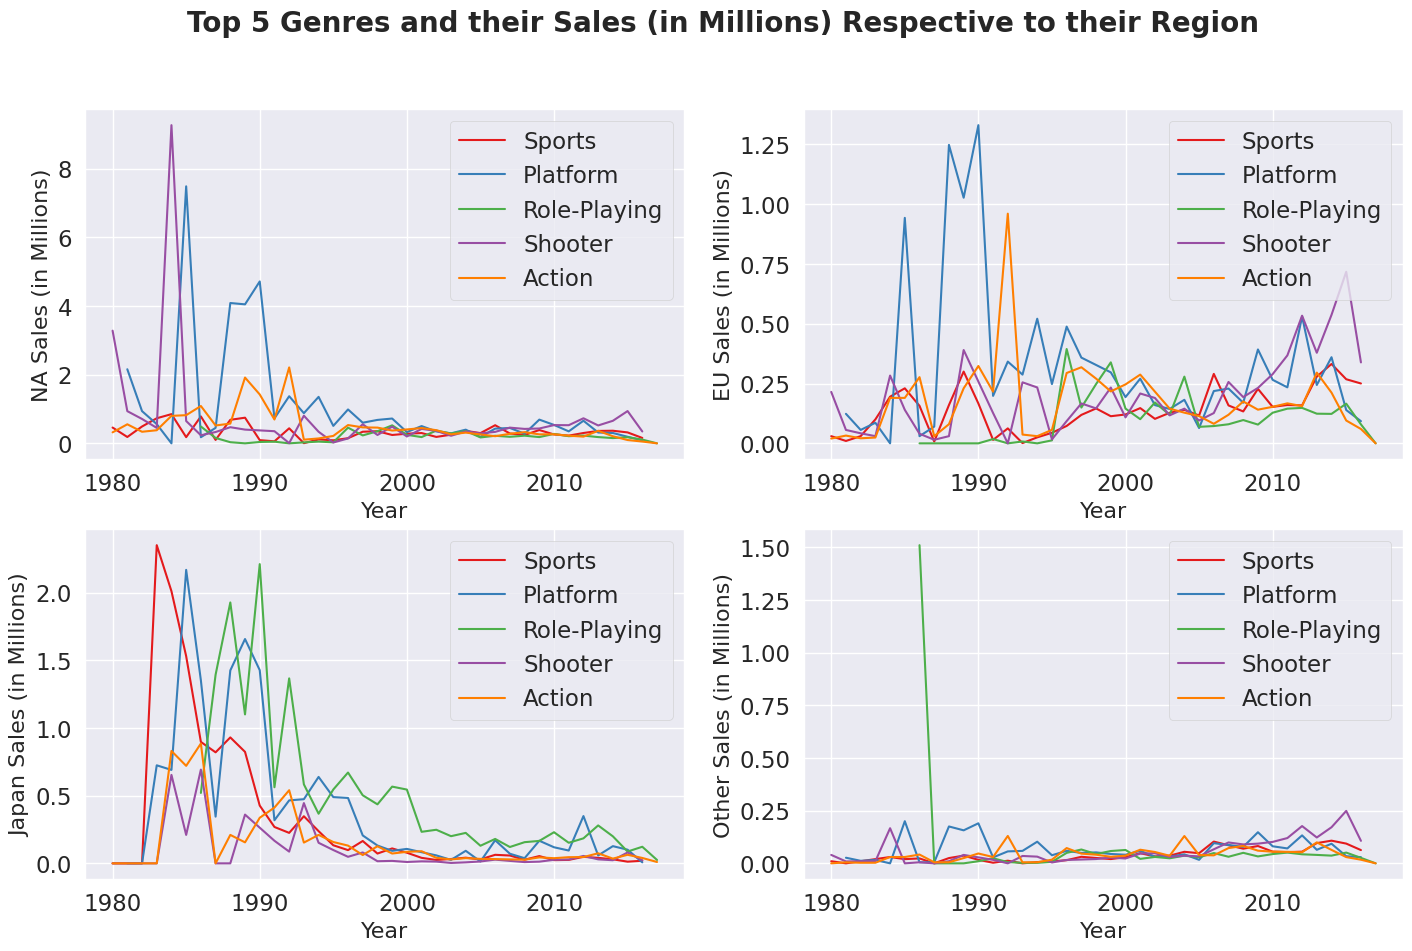

In [21]:
#line
top5_genres_list = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index

top5_genre_df = df[df['Genre'].isin(top5_genres_list)].reset_index(drop=True)  # Reset index to ensure unique labels

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(17, 10))

fig.suptitle('Top 5 Genres and their Sales (in Millions) Respective to their Region', fontsize=20, fontweight='bold')

sns.lineplot(x='Year_of_Release', y='NA_Sales', hue='Genre', data=top5_genre_df, errorbar=None, ax=ax0, palette='Set1')
sns.lineplot(x='Year_of_Release', y='EU_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax1, palette='Set1')
sns.lineplot(x='Year_of_Release', y='JP_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax2, palette='Set1')
sns.lineplot(x='Year_of_Release', y='Other_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax3, palette='Set1')

for ax in [ax0, ax1, ax2, ax3]:
    ax.legend(loc='upper right')
    ax.set_xlabel('Year', fontsize=16)

ax0.set_ylabel('NA Sales (in Millions)', fontsize=16)
ax1.set_ylabel('EU Sales (in Millions)', fontsize=16)
ax2.set_ylabel('Japan Sales (in Millions)', fontsize=16)
ax3.set_ylabel('Other Sales (in Millions)', fontsize=16)

plt.show()



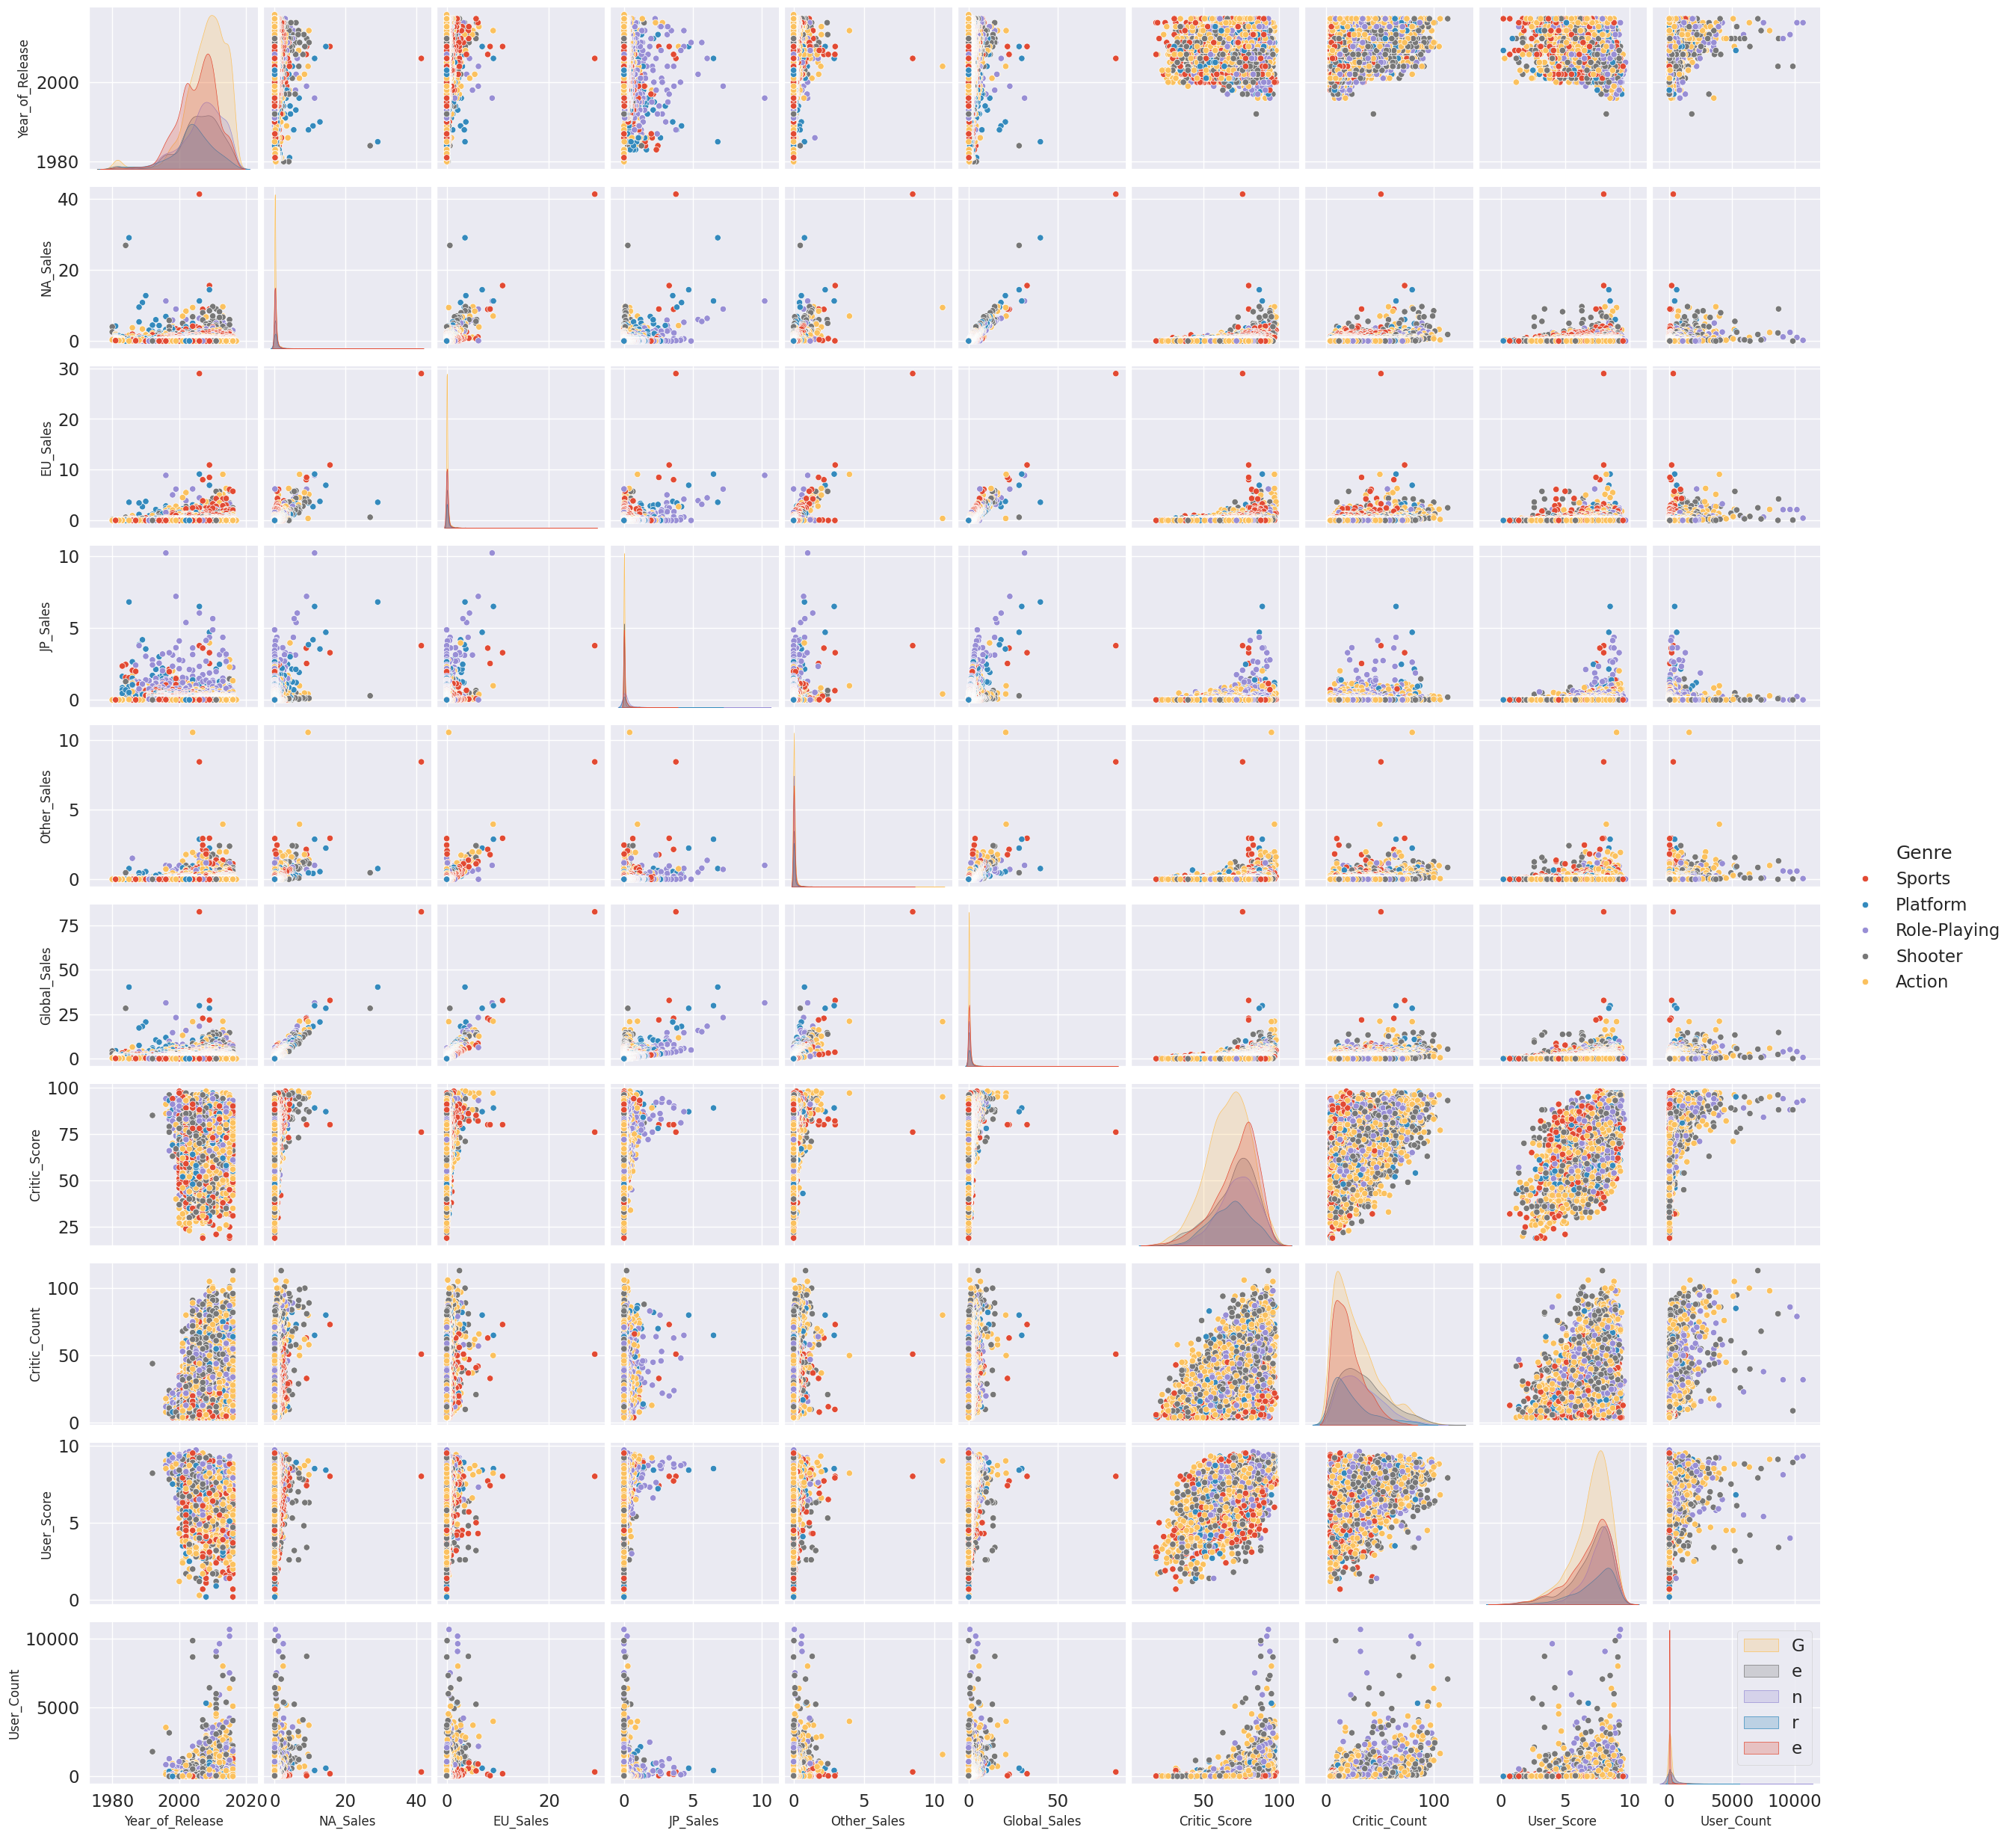

In [22]:
sns.pairplot(data = top5_genre_df, hue= 'Genre')
plt.legend('Genre')



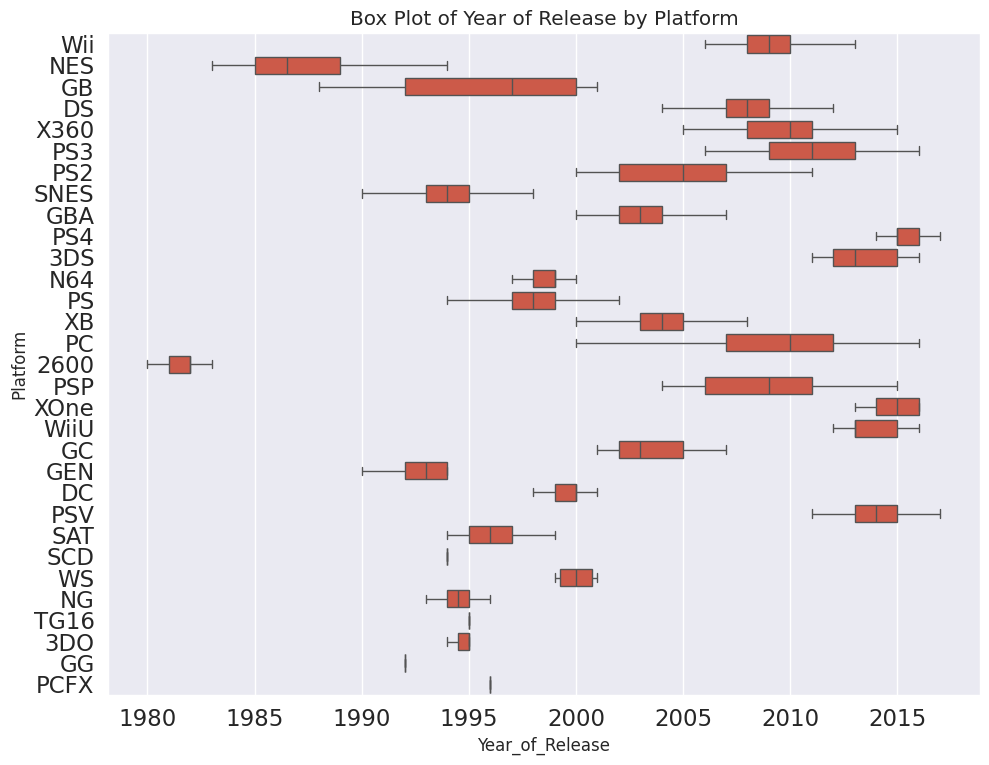

In [23]:
# Get the top platforms by count
top_platforms = df["Platform"].value_counts().sort_values(ascending=False).index.values

# Set the figure size with more height to increase space between y-axis ticks
plt.figure(figsize=(10, len(top_platforms) * 0.25))

# Plotting without outliers
sns.boxplot(y="Platform", x="Year_of_Release", data=df[df["Platform"].isin(top_platforms)], orient="h", showfliers=False)

plt.xlabel("Year_of_Release")
plt.ylabel("Platform")
plt.title("Box Plot of Year of Release by Platform")

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

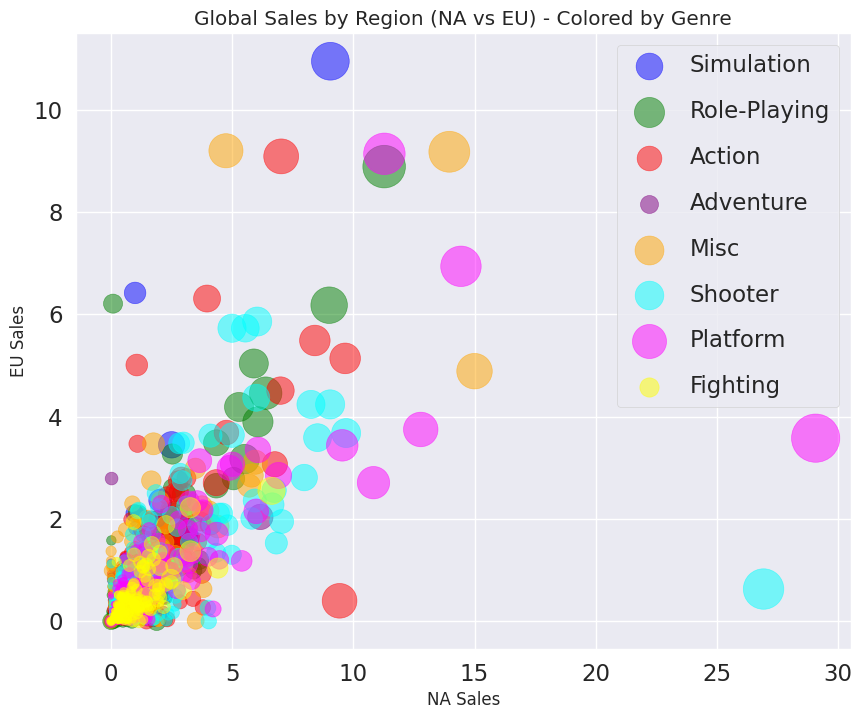

In [24]:
# Set up the plot
plt.figure(figsize=(10, 8))

# Create a dictionary to map each genre to a unique color
genre_color_map = {
    'Simulation': 'blue',
    'Role-Playing': 'green',
    'Action': 'red',
    'Adventure': 'purple',
    'Misc': 'orange',
    'Shooter': 'cyan',
    'Platform': 'magenta',
    'Fighting': 'yellow'
    # Add more genres and colors as needed
}

# Create the bubble plot
for genre, color in genre_color_map.items():
    genre_data = df[df['Genre'] == genre]
    plt.scatter(genre_data['NA_Sales'], genre_data['EU_Sales'] ,s=genre_data['Global_Sales']*30, alpha=0.5, label=genre, c=color)

# Set titles and labels
plt.title('Global Sales by Region (NA vs EU) - Colored by Genre')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')

# Add legend with label spacing
plt.legend(labelspacing=1.0)

# Show the plot
plt.show()

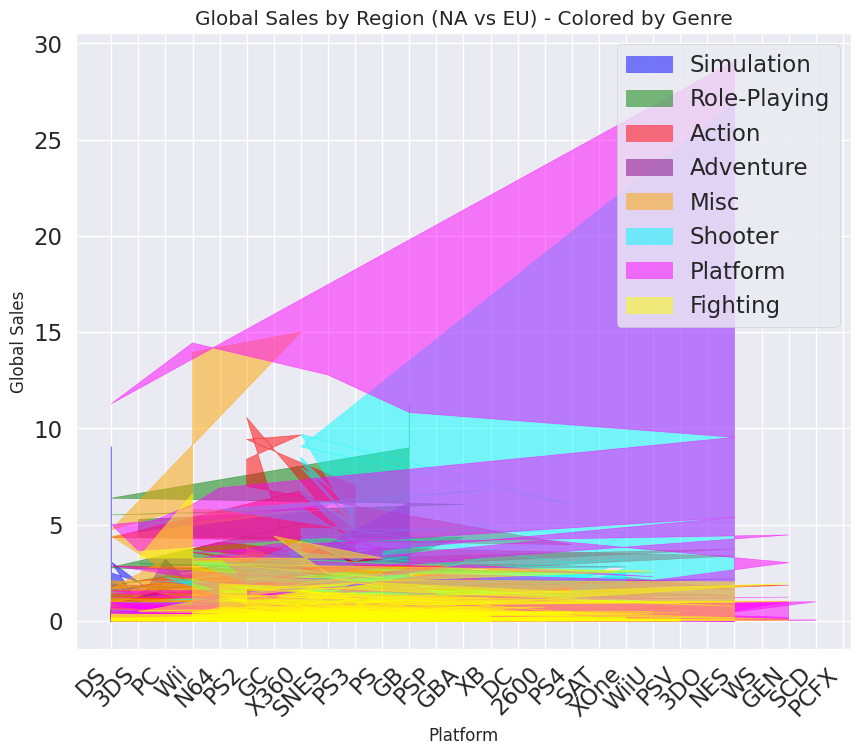

In [25]:
# Set the size of the bubbles proportional to Global_Sales
bubble_size = df['Global_Sales']  # Adjust multiplier as needed for better visualization

# Set up the plot
plt.figure(figsize=(10, 8))

# Create a dictionary to map each genre to a unique color
genre_color_map = {
    'Simulation': 'blue',
    'Role-Playing': 'green',
    'Action': 'red',
    'Adventure': 'purple',
    'Misc': 'orange',
    'Shooter': 'cyan',
    'Platform': 'magenta',
    'Fighting': 'yellow'
    # Add more genres and colors as needed
}

# Iterate over each genre and plot the area
for genre, color in genre_color_map.items():
    genre_data = df[df['Genre'] == genre]
    plt.fill_between(genre_data['Platform'], genre_data['Other_Sales'], genre_data['NA_Sales'], genre_data['EU_Sales'], label=genre, color=color, alpha=0.5)

# Set titles and labels
plt.title('Global Sales by Region (NA vs EU) - Colored by Genre')
plt.xlabel('Platform')
plt.ylabel('Global Sales')

# Add legend
plt.legend()

# Adjust spacing between platform labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [26]:
#area
import plotly.express as px

# Assuming top5_genre_df is your DataFrame containing the required columns after filtering

fig = px.area(df, x=['Platform','Rating'], y='Year_of_Release',
              color='Genre',
              labels={'value': 'Sales (in Millions)', 'Year_of_Release': 'Year'})
fig.update_layout(title='Genres and their Sales (in Millions) Respective to their Region',
                  title_font_size=20,
                  xaxis_title='Plateform', yaxis_title='Sales (in Millions)')
fig.show()






# **Part 3: Feature Engineering**


Drop Unneeded Columns (Name, Year, Publisher, and Platform, Rating)


In [31]:
videogame_df.drop(['Rating', 'Name', 'Year_of_Release', 'Publisher', 'Platform','Developer'], axis='columns', inplace=True)
videogame_df.head()

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0    Sports     41.36     28.96      3.77         8.45         82.53   
2    Racing     15.68     12.76      3.79         3.29         35.52   
3    Sports     15.61     10.93      3.28         2.95         32.77   
6  Platform     11.28      9.14      6.50         2.88         29.80   
7      Misc     13.96      9.18      2.93         2.84         28.92   

   Critic_Score  Critic_Count  User_Score  User_Count  
0          76.0          51.0         8.0       322.0  
2          82.0          73.0         8.3       709.0  
3          80.0          73.0         8.0       192.0  
6          89.0          65.0         8.5       431.0  
7          58.0          41.0         6.6       129.0

In [32]:
print('Check for missing values in the dataset: {}'.format(videogame_df.isnull().values.any()))

if videogame_df.isnull().values.any():
    old_size = len(videogame_df)

    videogame_df = videogame_df.dropna()

    new_size = len(videogame_df)

    print('\nNumber of Rows that were Removed: {:,}'.format(old_size - new_size))

Check for missing values in the dataset: False


In [33]:
before = videogame_df.shape[0]
print('Dataset size before outlier removal: {:,}'.format(before))

# Removes all records in the dataset that has data that is more than
# three standard deviations away from the mean of each column
videogame_df = videogame_df[(np.abs(stats.zscore(videogame_df[videogame_df.columns[1:]])) < 3).all(axis=1)].reset_index(drop=True)

after = videogame_df.shape[0]
print(' Dataset size after outlier removal: {:>6,}\n'.format(after) + '='*43 +
      '\n\t      Total records removed: {:>6,}'.format(before - after))

Dataset size before outlier removal: 6,825
 Dataset size after outlier removal:  6,402
	      Total records removed:    423


Apply label encoding to the genre.

In [34]:
videogame_df[['Genre']] = videogame_df[['Genre']].apply(LabelEncoder().fit_transform)
videogame_df.head()

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0      0      2.45      2.01      0.87         0.72          6.05   
1      0      3.18      1.83      0.78         0.24          6.03   
2      9      3.07      1.91      0.07         0.57          5.63   
3      0      2.54      1.93      0.21         0.86          5.55   
4      1      3.28      1.64      0.07         0.56          5.54   

   Critic_Score  Critic_Count  User_Score  User_Count  
0          96.0          42.0         8.7      1026.0  
1          94.0          20.0         9.4       918.0  
2          67.0          35.0         7.2        21.0  
3          91.0          70.0         8.6      1202.0  
4          81.0          77.0         7.7      1074.0

Assign features and labels


In [35]:
videogame_without_sales = videogame_df.drop(columns=['Global_Sales'])

labels = videogame_df['Global_Sales'].values
features = videogame_without_sales.values

In [36]:
X=features
y=labels

split the data and applay standard scaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test= scaler.transform(X_test)


# **Part 4: Models Selection**

LinearRegression model

In [39]:
regr = linear_model.LinearRegression()

# Train the model on the training data
regr.fit(X_train, y_train)

# Calculate accuracy on the training data
train_accuracy_lr = regr.score(X_train, y_train)
print("Linear Regression Accuracy on the training data:", train_accuracy_lr * 100, "%")

# Calculate accuracy on the test data
test_accuracy_lr = regr.score(X_test, y_test)
print("Linear Regression Accuracy on the test data:", test_accuracy_lr * 100, "%")

Linear Regression Accuracy on the training data: 99.99386186465998 %
Linear Regression Accuracy on the test data: 99.9935448361166 %


Gradient Boosting Regressor model

In [41]:

# Create a Gradient Boosting Regressor model
M = GradientBoostingRegressor()

# Train the model on the training data
M.fit(X_train, y_train)

# Calculate accuracy on the training data
train_accuracy_gb = M.score(X_train, y_train)
print("Gradient BoostingRegressor Accuracy on the training data:", train_accuracy_gb * 100, "%")

# Calculate accuracy on the test data
test_accuracy_gb = M.score(X_test, y_test)
print("Gradient BoostingRegressor Accuracy on the test data:", test_accuracy_gb * 100, "%")


Gradient BoostingRegressor Accuracy on the training data: 99.81061593170976 %
Gradient BoostingRegressor Accuracy on the test data: 99.64475534587586 %


DecisionTreeRegressor and RandomForestRegressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Decision Tree Regressor
M2 = DecisionTreeRegressor()
M2.fit(X_train, y_train)

# Calculate accuracy on the training data for Decision Tree Regressor
accuracy_train_M2 = M2.score(X_train, y_train)
print("Decision Tree Regressor Accuracy on the training data:", accuracy_train_M2 * 100, "%")

# Calculate accuracy on the test data for Decision Tree Regressor
accuracy_test_M2 = M2.score(X_test, y_test)
print("Decision Tree Regressor Accuracy on the test data:", accuracy_test_M2 * 100, "%")

# Random Forest Regressor
M3 = RandomForestRegressor()
M3.fit(X_train, y_train)

# Calculate accuracy on the training data for Random Forest Regressor
accuracy_train_M3 = M3.score(X_train, y_train)
print("Random Forest Regressor Accuracy on the training data:", accuracy_train_M3 * 100, "%")

# Calculate accuracy on the test data for Random Forest Regressor
accuracy_test_M3 = M3.score(X_test, y_test)
print("Random Forest Regressor Accuracy on the test data:", accuracy_test_M3 * 100, "%")


Decision Tree Regressor Accuracy on the training data: 100.0 %
Decision Tree Regressor Accuracy on the test data: 98.32513740165386 %
Random Forest Regressor Accuracy on the training data: 99.87153464392148 %
Random Forest Regressor Accuracy on the test data: 99.32012248527991 %


#**Part 5: Comparing the models**

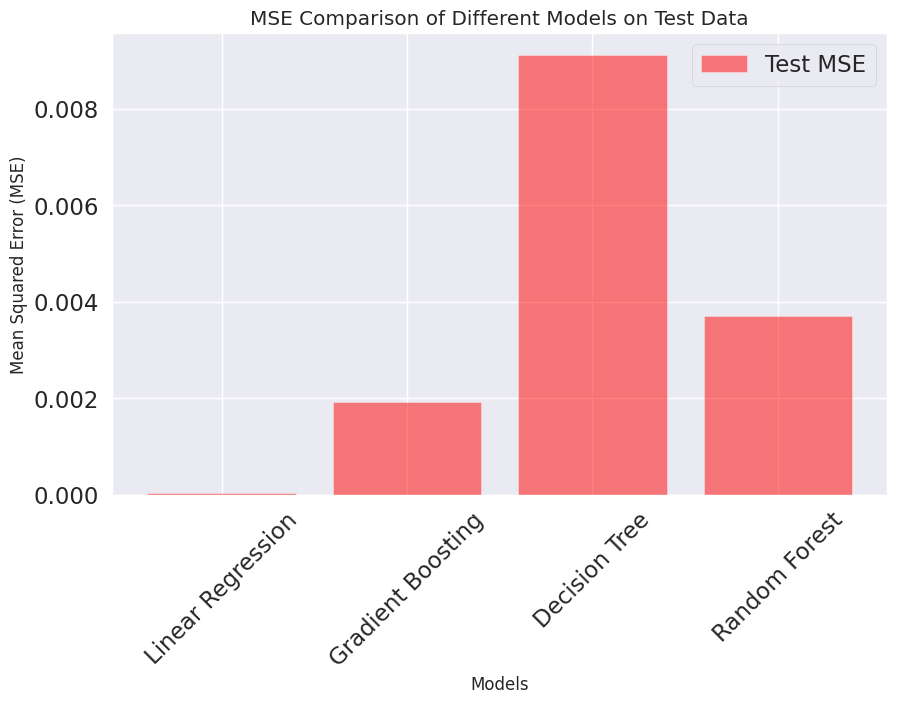

In [43]:


# Calculate MSE for each model on the test data
mse_regr_test = mean_squared_error(y_test, regr.predict(X_test))
mse_M_test = mean_squared_error(y_test, M.predict(X_test))
mse_M2_test = mean_squared_error(y_test, M2.predict(X_test))
mse_M3_test = mean_squared_error(y_test, M3.predict(X_test))

# Plot the MSE for each model on the test data
models = ['Linear Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest']
test_mses = [mse_regr_test, mse_M_test, mse_M2_test, mse_M3_test]

plt.figure(figsize=(10, 6))
plt.bar(models, test_mses, color='red', alpha=0.5, label='Test MSE')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of Different Models on Test Data')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# **Part 6: Hyperparameters tuning**

Hyperparameters tuning for linear regression

In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for GridSearchCV
parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=linear_model.LinearRegression(), param_grid=parameters, cv=3)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Display the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Create a new Linear Regression model with the best hyperparameters
best_regr = linear_model.LinearRegression(**best_params)

# Train the model on the training data
best_regr.fit(X_train, y_train)

# Calculate accuracy on the training data
train_accuracy_lr_best = best_regr.score(X_train, y_train)
print("Best Linear Regression Accuracy on the training data:", train_accuracy_lr_best * 100, "%")

# Calculate accuracy on the test data
test_accuracy_lr_best = best_regr.score(X_test, y_test)
print("Best Linear Regression Accuracy on the test data:", test_accuracy_lr_best * 100, "%")


Best Hyperparameters:
copy_X: True
fit_intercept: True
Best Linear Regression Accuracy on the training data: 99.99386186465998 %
Best Linear Regression Accuracy on the test data: 99.9935448361166 %


Hyperparameters tuning for GradientBoostingRegressor

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameters grid for GridSearchCV
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=parameters, cv=3)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Display the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Create a new Gradient Boosting Regressor model with the best hyperparameters
best_gb = GradientBoostingRegressor(**best_params)

# Train the model on the training data
best_gb.fit(X_train, y_train)

# Calculate accuracy on the training data
train_accuracy_gb_best = best_gb.score(X_train, y_train)
print("Best Gradient BoostingRegressor Accuracy on the training data:", train_accuracy_gb_best * 100, "%")

# Calculate accuracy on the test data
test_accuracy_gb_best = best_gb.score(X_test, y_test)
print("Best Gradient BoostingRegressor Accuracy on the test data:", test_accuracy_gb_best * 100, "%")


Best Hyperparameters:
learning_rate: 0.1
max_depth: 4
n_estimators: 150
Best Gradient BoostingRegressor Accuracy on the training data: 99.9380705803099 %
Best Gradient BoostingRegressor Accuracy on the test data: 99.72763818637739 %


Hyperparameters tuning for DecisionTreeRegressor

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameters grid for GridSearchCV
parameters = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters, cv=3)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Display the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Create a new Decision Tree Regressor model with the best hyperparameters
best_dt = DecisionTreeRegressor(**best_params)

# Train the model on the training data
best_dt.fit(X_train, y_train)

# Calculate accuracy on the training data
train_accuracy_dt_best = best_dt.score(X_train, y_train)
print("Best Decision Tree Regressor Accuracy on the training data:", train_accuracy_dt_best * 100, "%")

# Calculate accuracy on the test data
test_accuracy_dt_best = best_dt.score(X_test, y_test)
print("Best Decision Tree Regressor Accuracy on the test data:", test_accuracy_dt_best * 100, "%")


Best Hyperparameters:
max_depth: 10
min_samples_leaf: 2
min_samples_split: 5
Best Decision Tree Regressor Accuracy on the training data: 99.70883119443448 %
Best Decision Tree Regressor Accuracy on the test data: 98.25980088438165 %


Hyperparameters tuning for RandomForestRegressor


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameters grid for GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=3)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Display the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Create a new Random Forest Regressor model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)

# Train the model on the training data
best_rf.fit(X_train, y_train)

# Calculate accuracy on the training data
train_accuracy_rf_best = best_rf.score(X_train, y_train)
print("Best Random Forest Regressor Accuracy on the training data:", train_accuracy_rf_best * 100, "%")

# Calculate accuracy on the test data
test_accuracy_rf_best = best_rf.score(X_test, y_test)
print("Best Random Forest Regressor Accuracy on the test data:", test_accuracy_rf_best * 100, "%")


Best Hyperparameters:
max_depth: None
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 300
Best Random Forest Regressor Accuracy on the training data: 99.88509202037422 %
Best Random Forest Regressor Accuracy on the test data: 99.34138115858661 %
